#**CATEGORICAL STROKE PROBABLITY ANALYSIS USING NAIVE BAYES CLASSIFICATION**





##**Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


#**Tratamento dos Dados**

##**HEALTHCARE DATASET STROKE**

Como o dataset se encontra no formato CSV (comma separated values), utilizamos a função read_csv da biblioteca Pandas para extrair os dados e os organizar em uma matriz bidimensional.

In [ ]:
df_hds= pd.read_csv('/content/gdrive/MyDrive/Stroke Prediction Dataset/healthcare-dataset-stroke-data.csv')

Em seguida, nós criamos outra tabela na qual substituímos todos os valores nominais por numéricos

In [ ]:

df_hds['gender'].replace('Male','0', inplace=True)
df_hds['gender'].replace('Female','1', inplace=True)
df_hds['gender'].replace('Other','2', inplace=True)

df_hds['ever_married'].replace('Yes','1', inplace=True)
df_hds['ever_married'].replace('No','0', inplace=True)


df_hds['work_type'].replace('Govt_job','0', inplace=True)
df_hds['work_type'].replace('Never_worked','1', inplace=True)
df_hds['work_type'].replace('Private','2', inplace=True)
df_hds['work_type'].replace('Self-employed','3', inplace=True)
df_hds['work_type'].replace('children','4', inplace=True)

df_hds['Residence_type'].replace('Urban','0', inplace=True)
df_hds['Residence_type'].replace('Rural','1', inplace=True)

df_hds['smoking_status'].replace('Unknown','0', inplace=True)
df_hds['smoking_status'].replace('formerly smoked','1', inplace=True)
df_hds['smoking_status'].replace('never smoked','2', inplace=True)
df_hds['smoking_status'].replace('smokes','3', inplace=True)


As colunas cujos valores são contínuos foram separadas em 9 (bmi e idade) ou 10 (nível médio de glicose) categorias, visto que, através de alguns testes, concluímos que a acurácia do modelo não seria afetada por tal mudança no dataset.

In [ ]:
bmihds = np.array(df_hds["bmi"].values)
agehds = np.array(df_hds["age"].values)
glucosehds = np.array(df_hds["avg_glucose_level"].values)

df_hds["bmi"] = pd.cut(x=bmihds , bins = 9, labels = [0,1,2,3,4,5,6,7,8])
df_hds["age"] = pd.cut(x= agehds, bins = 9, labels =[0,1,2,3,4,5,6,7,8])
df_hds["avg_glucose_level"] = pd.cut(x=glucosehds, bins = 10, labels = [0,1,2,3,4,5,6,7,8,9])
df_hds.head(10)

id gender age  hypertension  heart_disease ever_married work_type  \
0   9046      0   7             0              1            1         2   
1  51676      1   6             0              0            1         3   
2  31112      0   8             0              1            1         2   
3  60182      1   5             0              0            1         2   
4   1665      1   8             1              0            1         3   
5  56669      0   8             0              0            1         2   
6  53882      0   8             1              1            1         2   
7  10434      1   7             0              0            0         2   
8  27419      1   6             0              0            1         2   
9  60491      1   8             0              0            1         2   

  Residence_type avg_glucose_level  bmi smoking_status  stroke  
0              0                 8    2              1       1  
1              1                 6  NaN              2       1  
2              1                 2    2              2       1  
3              0                 5    2              3       1  
4              1                 5    1              2       1  
5              0                 6    1              1       1  
6              1                 0    1              2       1  
7              0                 1    1              2       1  
8              1                 0  NaN              0       1  
9              0                 0    1              0       1

Em seguida, removemos as linhas com informações incompletas (NaN)

In [ ]:
df_hds = df_hds.dropna()
df_hds.head(10)

id gender age  hypertension  heart_disease ever_married work_type  \
0    9046      0   7             0              1            1         2   
2   31112      0   8             0              1            1         2   
3   60182      1   5             0              0            1         2   
4    1665      1   8             1              0            1         3   
5   56669      0   8             0              0            1         2   
6   53882      0   8             1              1            1         2   
7   10434      1   7             0              0            0         2   
9   60491      1   8             0              0            1         2   
10  12109      1   8             1              0            1         2   
11  12095      1   6             0              1            1         0   

   Residence_type avg_glucose_level bmi smoking_status  stroke  
0               0                 8   2              1       1  
2               1                 2   2              2       1  
3               0                 5   2              3       1  
4               1                 5   1              2       1  
5               0                 6   1              1       1  
6               1                 0   1              2       1  
7               0                 1   1              2       1  
9               0                 0   1              0       1  
10              1                 1   1              2       1  
11              1                 3   2              3       1

Por fim, transformamos os valores do tipo inteiro para o tipo flutuante, uma vez que o nosso modelo requer dados deste tipo

In [ ]:
df_hds = df_hds.astype(float)
df_hds.head(10)

id  gender  age  hypertension  heart_disease  ever_married  \
0    9046.0     0.0  7.0           0.0            1.0           1.0   
2   31112.0     0.0  8.0           0.0            1.0           1.0   
3   60182.0     1.0  5.0           0.0            0.0           1.0   
4    1665.0     1.0  8.0           1.0            0.0           1.0   
5   56669.0     0.0  8.0           0.0            0.0           1.0   
6   53882.0     0.0  8.0           1.0            1.0           1.0   
7   10434.0     1.0  7.0           0.0            0.0           0.0   
9   60491.0     1.0  8.0           0.0            0.0           1.0   
10  12109.0     1.0  8.0           1.0            0.0           1.0   
11  12095.0     1.0  6.0           0.0            1.0           1.0   

    work_type  Residence_type  avg_glucose_level  bmi  smoking_status  stroke  
0         2.0             0.0                8.0  2.0             1.0     1.0  
2         2.0             1.0                2.0  2.0             2.0     1.0  
3         2.0             0.0                5.0  2.0             3.0     1.0  
4         3.0             1.0                5.0  1.0             2.0     1.0  
5         2.0             0.0                6.0  1.0             1.0     1.0  
6         2.0             1.0                0.0  1.0             2.0     1.0  
7         2.0             0.0                1.0  1.0             2.0     1.0  
9         2.0             0.0                0.0  1.0             0.0     1.0  
10        2.0             1.0                1.0  1.0             2.0     1.0  
11        0.0             1.0                3.0  2.0             3.0     1.0

##**STROKE PREDICTION BRFSS2015**

O nosso segundo dataset recebeu o mesmo tratamento descrito acima:
- Dados nominais foram transformados em números
- Dados contínuos foram divididos em categoriais
- Linhas com informações incompletas foram excluídas
- Transformamos todos os dados no tipo flutuante

In [ ]:
df_brfss =pd.read_csv('/content/gdrive/MyDrive/Stroke Prediction Dataset/stroke_prediction_brfss2015.csv')

In [ ]:
df_brfss.head(10)

Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2  13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3  11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4   8.0  0.0       0.0        1.0  29.0     1.0                   0.0   
5   1.0  0.0       0.0        1.0  18.0     0.0                   0.0   
6  13.0  1.0       1.0        1.0  26.0     1.0                   0.0   
7   6.0  1.0       0.0        1.0  31.0     1.0                   0.0   
8   3.0  0.0       0.0        1.0  32.0     0.0                   0.0   
9   6.0  1.0       0.0        1.0  27.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       5.0   
1           0.0     1.0      0.0                0.0      3.0       0.0   
2           1.0     1.0      1.0                0.0      1.0       0.0   
3           1.0     1.0      1.0                0.0      3.0       0.0   
4           1.0     1.0      1.0                0.0      2.0       0.0   
5           1.0     1.0      1.0                0.0      2.0       7.0   
6           1.0     1.0      1.0                1.0      1.0       0.0   
7           0.0     1.0      1.0                0.0      4.0       0.0   
8           1.0     1.0      1.0                0.0      3.0       0.0   
9           0.0     1.0      1.0                0.0      3.0       0.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0      30.0       0.0     0.0     1.0       0.0  
1       0.0       0.0     1.0     1.0       0.0  
2      10.0       0.0     0.0     0.0       0.0  
3       3.0       0.0     0.0     1.0       0.0  
4       0.0       0.0     0.0     0.0       0.0  
5       0.0       0.0     0.0     0.0       0.0  
6       0.0       0.0     0.0     0.0       0.0  
7       0.0       0.0     0.0     0.0       0.0  
8       0.0       0.0     0.0     0.0       0.0  
9       6.0       0.0     0.0     0.0       0.0

In [ ]:
bmi_brfss = np.array(df_brfss["BMI"].values)
menthlth_brfss = np.array(df_brfss["MentHlth"].values)
physhlth_brfss = np.array(df_brfss["PhysHlth"].values)

df_brfss["BMI"] = pd.cut(bmi_brfss, bins = 9, labels = [0,1,2,3,4,5,6,7,8]).astype(float)
df_brfss["MentHlth"] = pd.cut(menthlth_brfss, bins = 5, labels=[0,1,2,3,4]).astype(float)
df_brfss["PhysHlth"] = pd.cut(physhlth_brfss, bins = 5, labels=[0,1,2,3,4]).astype(float)

df_brfss.head(10)

Age  Sex  HighChol  CholCheck  BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  1.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  1.0     1.0                   0.0   
2  13.0  1.0       0.0        1.0  1.0     0.0                   0.0   
3  11.0  1.0       1.0        1.0  1.0     1.0                   0.0   
4   8.0  0.0       0.0        1.0  1.0     1.0                   0.0   
5   1.0  0.0       0.0        1.0  0.0     0.0                   0.0   
6  13.0  1.0       1.0        1.0  1.0     1.0                   0.0   
7   6.0  1.0       0.0        1.0  1.0     1.0                   0.0   
8   3.0  0.0       0.0        1.0  2.0     0.0                   0.0   
9   6.0  1.0       0.0        1.0  1.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       0.0   
1           0.0     1.0      0.0                0.0      3.0       0.0   
2           1.0     1.0      1.0                0.0      1.0       0.0   
3           1.0     1.0      1.0                0.0      3.0       0.0   
4           1.0     1.0      1.0                0.0      2.0       0.0   
5           1.0     1.0      1.0                0.0      2.0       1.0   
6           1.0     1.0      1.0                1.0      1.0       0.0   
7           0.0     1.0      1.0                0.0      4.0       0.0   
8           1.0     1.0      1.0                0.0      3.0       0.0   
9           0.0     1.0      1.0                0.0      3.0       0.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0       4.0       0.0     0.0     1.0       0.0  
1       0.0       0.0     1.0     1.0       0.0  
2       1.0       0.0     0.0     0.0       0.0  
3       0.0       0.0     0.0     1.0       0.0  
4       0.0       0.0     0.0     0.0       0.0  
5       0.0       0.0     0.0     0.0       0.0  
6       0.0       0.0     0.0     0.0       0.0  
7       0.0       0.0     0.0     0.0       0.0  
8       0.0       0.0     0.0     0.0       0.0  
9       0.0       0.0     0.0     0.0       0.0

#**Análise Exploratória dos Dados**

##**Tamanho de cada dataset**

In [ ]:
print(f'Tamanho do Healthcare Dataset Stroke: {df_hds.shape[0]}')
print(f'Tamanho do BRFSS2015: {df_brfss.shape[0]}')

Tamanho do Healthcare Dataset Stroke: 4909
Tamanho do BRFSS2015: 70692


##**Correlação das Variáveis**

Com esse mapa de correlação fica evidente que os parâmetros realmente não são tão relacionados entre si, assim como o classificador ingênuo de Bayes assume.

[Text(0.5, 1.0, 'Correlação das Variáveis do Healthcare Dataset Stroke')]

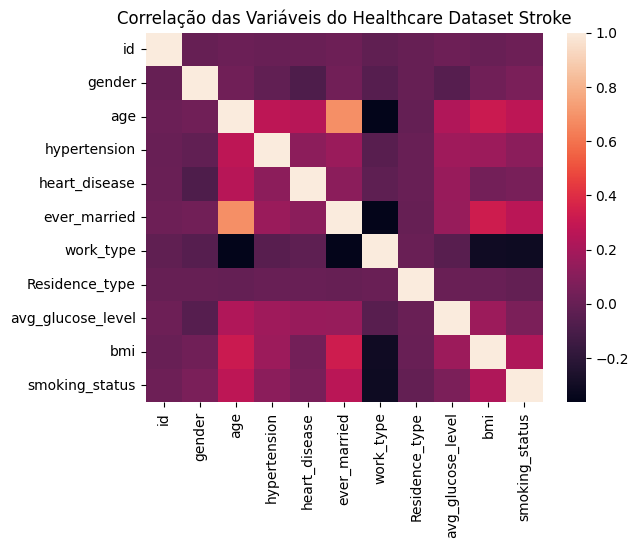

In [ ]:
corr = df_hds.iloc[:, :-1].corr(method='pearson')
sns.heatmap(corr).set(title='Correlação das Variáveis do Healthcare Dataset Stroke')

[Text(0.5, 1.0, 'Correlação das Variáveis do BRFSS2015')]

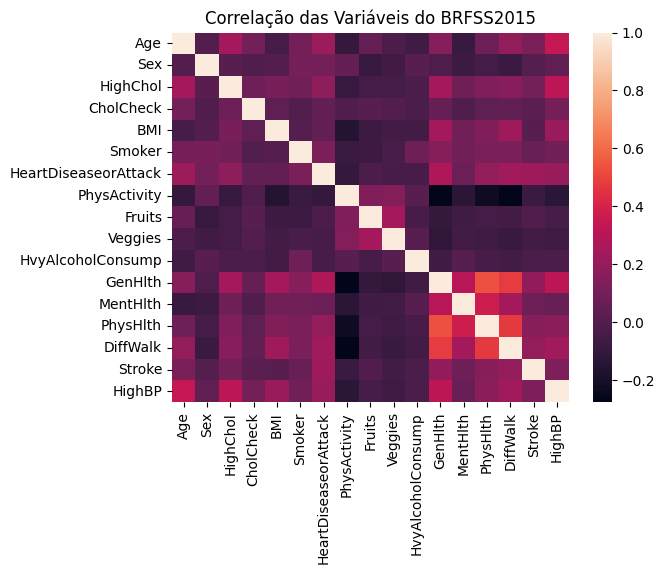

In [ ]:
corr = df_brfss.iloc[:, :-1].corr(method='pearson')
sns.heatmap(corr).set(title='Correlação das Variáveis do BRFSS2015')

##**Distribuição das Variáveis**

###**HealthCare Dataset Stroke**

<Axes: xlabel='smoking_status', ylabel='Count'>

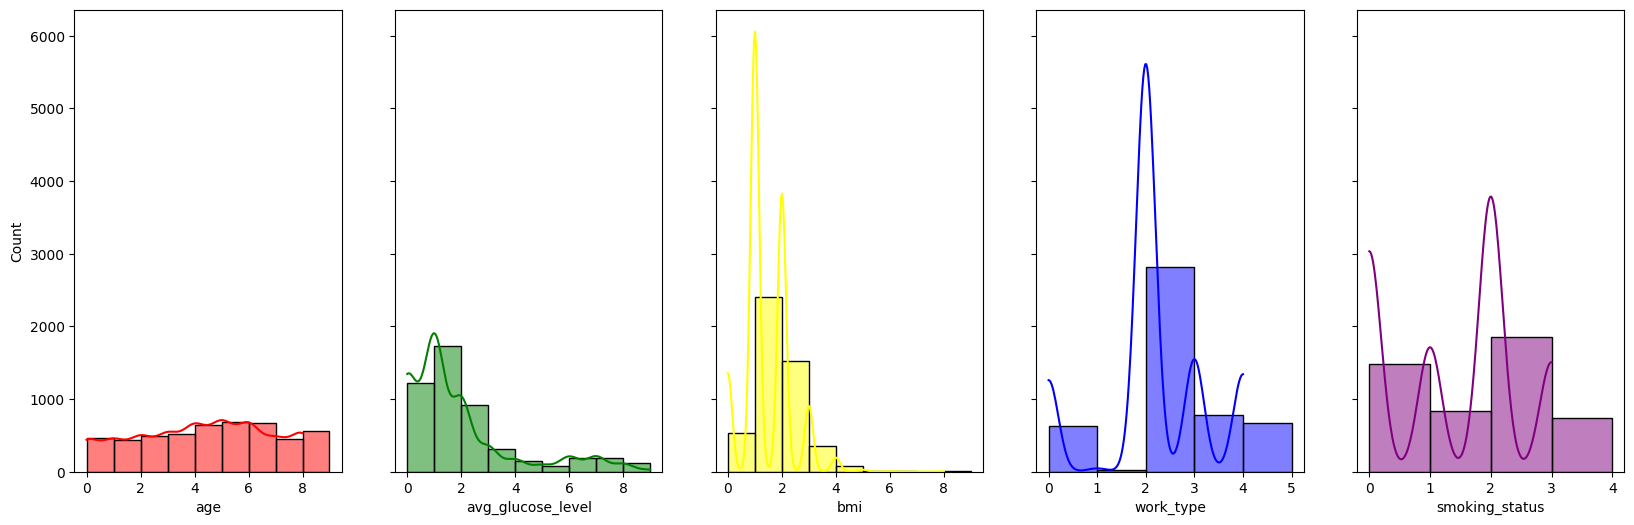

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(20, 6), sharey=True)

sns.histplot(df_hds,bins=np.arange(0,10), ax=axes[0], x='age', kde=True,color='red')
sns.histplot(df_hds,bins=np.arange(0,10),ax=axes[1], x='avg_glucose_level', kde=True, color='green')
sns.histplot(df_hds,bins=np.arange(0,10), ax=axes[2], x='bmi', kde=True, color='yellow')
sns.histplot(df_hds,bins=np.arange(0,6), ax=axes[3], x='work_type', kde=True, color='blue')
sns.histplot(df_hds,bins=np.arange(0,5), ax=axes[4], x='smoking_status', kde=True,  color='purple')


In [ ]:

gender_hds = df_hds['gender'].value_counts()
hypertension_hds = df_hds['hypertension'].value_counts()
heart_disease_hds = df_hds['heart_disease'].value_counts()
ever_married_hds = df_hds['ever_married'].value_counts()
Residence_type_hds = df_hds['Residence_type'].value_counts()
stroke_hds = df_hds['stroke'].value_counts()


fig = plt.figure(figsize=(10,4), dpi=1600)

#first row, first column
ax1 = plt.subplot2grid((2,3),(0,0))
plt.pie(gender_hds, labels=['Masculino','Feminino','Outro'], autopct='%.0f%%')
plt.title('gênero')


#first row sec column
ax1 = plt.subplot2grid((2,3), (0, 1))
plt.pie(hypertension_hds, labels=['Não','Sim'], autopct='%.0f%%')
plt.title('hipertensão')

#first row, third column
ax1 = plt.subplot2grid((2,3),(0, 2))
plt.pie(heart_disease_hds, labels=['Não','Sim'], autopct='%.0f%%')
plt.title('doença cardíaca')

#Second row first column
ax1 = plt.subplot2grid((2,3), (1, 0))
plt.pie(ever_married_hds, labels=['Nunca','Já'], autopct='%.0f%%')
plt.title('Já se casou?')

#second row second column
ax1 = plt.subplot2grid((2,3), (1, 1))
plt.pie(Residence_type_hds, labels=['Urbano','Rural'], autopct='%.0f%%')
plt.title('Tipo de Residência')

#second row third column
ax1 = plt.subplot2grid((2,3), (1, 2))
plt.pie(stroke_hds, labels=['Não teve','Teve'], autopct='%.0f%%')
plt.title('Teve AVC?')

plt.show()


###**BRFSS2015**

<Axes: xlabel='MentHlth', ylabel='Count'>

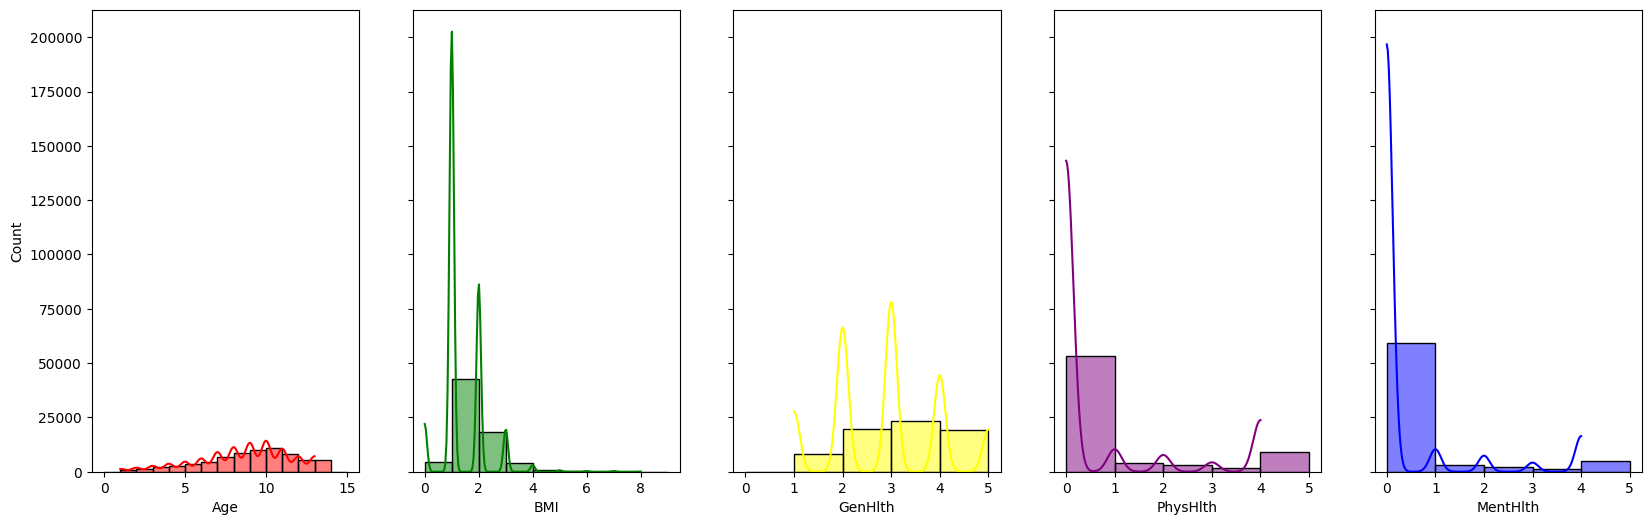

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(20, 6), sharey=True)

sns.histplot(df_brfss,bins=np.arange(0,16), ax=axes[0], x='Age', kde=True, color='red')
sns.histplot(df_brfss,bins=np.arange(0,10), ax=axes[1], x='BMI', kde=True, color='green')
sns.histplot(df_brfss,bins=np.arange(0,6), ax=axes[2], x='GenHlth', kde=True, color='yellow')
sns.histplot(df_brfss,bins=np.arange(0,6), ax=axes[3], x='PhysHlth', kde=True, color='purple')
sns.histplot(df_brfss,bins=np.arange(0,6), ax=axes[4], x='MentHlth', kde=True, color='blue')


In [ ]:

Sex_brfss = df_brfss['Sex'].value_counts()
HighChol_brfss = df_brfss['HighChol'].value_counts()
CholCheck_brfss = df_brfss['CholCheck'].value_counts()

Smoker_brfss = df_brfss['Smoker'].value_counts()
HeartDiseaseorAttack_brfss = df_brfss['HeartDiseaseorAttack'].value_counts()
Fruits_brfss = df_brfss['Fruits'].value_counts()

Veggies_brfss = df_brfss['Veggies'].value_counts()
HvyAlcoholConsump_brfss = df_brfss['HvyAlcoholConsump'].value_counts()
DiffWalk_brfss = df_brfss['DiffWalk'].value_counts()

HighBP_brfss = df_brfss['HighBP'].value_counts()
Diabetes_brfss = df_brfss['Diabetes'].value_counts()
Stroke_brfss = df_brfss['Stroke'].value_counts()


In [ ]:
fig = plt.figure(figsize=(10,4), dpi=2000)


ax1 = plt.subplot2grid((3,4),(0,0))
plt.pie(Sex_brfss, labels=['Masculino','Feminino'], autopct='%.0f%%')
plt.title('Sexo')


ax1 = plt.subplot2grid((3,4), (0, 1))
plt.pie(HighChol_brfss, labels=['Não','Sim'], autopct='%.0f%%')
plt.title('Colesterol Alto')


ax1 = plt.subplot2grid((3,4),(0, 2))
plt.pie(CholCheck_brfss, labels=['Não','Sim'], autopct='%.0f%%')
plt.title('Colesterol\nchecado em 5 anos ')

ax1 = plt.subplot2grid((3,4), (0,3))
plt.pie(Smoker_brfss, labels=['Não','Sim'], autopct='%.0f%%')
plt.title('Fumante')

#################################################################

ax1 = plt.subplot2grid((3,4), (1,0))
plt.pie(HeartDiseaseorAttack_brfss, labels=['não','sim'], autopct='%.0f%%')
plt.title('Doença/Ataque Cardíaco')

ax1 = plt.subplot2grid((3,4), (1,1))
plt.pie(Fruits_brfss, labels=['Não','Sim'], autopct='%.0f%%')
plt.title('Frutas na dieta')

ax1 = plt.subplot2grid((3,4), (1,2))
plt.pie(Veggies_brfss, labels=['Não','Sim'], autopct='%.0f%%')
plt.title('Vegetais\nna dieta')

ax1 = plt.subplot2grid((3,4), (1,3))
plt.pie(HvyAlcoholConsump_brfss, labels=['Não','Sim'], autopct='%.0f%%')
plt.title('Abuso de Alcool')
###################################################################
ax1 = plt.subplot2grid((3,4), (2, 0))
plt.pie(DiffWalk_brfss, labels=['Não','Sim'], autopct='%.0f%%')
plt.title('Dificuldade\nLocomotiva')

ax1 = plt.subplot2grid((3,4), (2, 1))
plt.pie(HighBP_brfss, labels=['Não','Sim'], autopct='%.0f%%')
plt.title('Pressão Alta')

ax1 = plt.subplot2grid((3,4), (2, 2))
plt.pie(Diabetes_brfss, labels=['Não','Sim'], autopct='%.0f%%')
plt.title('Diabetes')

ax1 = plt.subplot2grid((3,4), (2, 3))
plt.pie(Stroke_brfss, labels=['Não','Sim'], autopct='%.0f%%')
plt.title('AVC')


Text(0.5, 1.0, 'AVC')

#**Implementações de Naive Bayes**

O Teorema de Bayes é dado por $P(Y | X) = \frac{P(Y) \prod _{i=1} ^{n}P(X_i|Y) }{P(X)}$

A função calculate_prior nos permite calcular $P(Y)$, enquanto calculate_likelihood_categorical calcula cada probabilidade condicionada $P(X_i|Y)$.

Por fim, naive_bayes_categorical nos entrega o resultado $P(Y|X)$. Em ambas implementações, a probabilidade $P(X)$ foi desconsiderada, uma vez que ela não depende de Y e é, muitas vezes, difícil de computar.

Dessa forma, buscamos achar o Y que maximize $P(Y|X)$.

####Função que auxilia na exposição dos resultados:

In [ ]:
def show_results(Y_test, predictions):
  print('Accuracy score:', accuracy_score(Y_test, predictions))
  print('F1 score:', f1_score(Y_test, predictions))

  disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, predictions), display_labels=None)
  disp.plot()
  plt.show()

##**IMPLEMENTAÇÃO 1: naive_bayes_categorical**

> Bloco com recuo



###**CÓDIGO**

In [ ]:
#A função irá retornar um array com todas as probabilidades P(Y).
#No nosso caso, há dois possíveis valores para Y: Y=0 (não teve AVC) e Y=1 (teve AVC)
def calculate_prior(df, Y):
    #ordenamos a lista de valores únicos de Y (0 e 1)
    classes = sorted(list(df[Y].unique()))
    print(classes)
    prior = []
    for i in classes:
        #dividimos os casos em que o paciente teve/não teve AVC pelos casos totais para encontrar P(Y)
        #em seguida, inserimos P(Y) no array que será retornado
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [ ]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    #Primeiro, criamos uma lista com todos os possíveis X (gender, age, BMI, ...)
    feat = list(df.columns)
    #Limitamos nosso array às linhas em que Y=label
    df = df[df[Y]==label]
    #P(X|Y) será P(Y∩X)/P(Y)
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

In [ ]:
def naive_bayes_categorical(df, X, Y):
    #Criamos uma lista com todas as características menos "Stroke"
    features = list(df.columns)[:-1]

    #Calculamos P(Y), em que Y="Stroke"
    prior = calculate_prior(df, Y)

    Y_pred = []
    #Calculamos o produto de todos os P(X|Y)
    for x in X:
        #ordenamos a lista de valores únicos de Y (0 e 1)
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        #para cada Y (0 ou 1)
        for j in range(len(labels)):
            #para todo X
            for i in range(len(features)):
                #calculamos o produto de P(X|Y)
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        #Calculamos P(Y|X) para todo Y
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        #Pegamos o maior Y cuja probabilidade P(Y|X) é a maior
        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

###**RESULTADOS**


####Para o 1° dataset (HDS), a divisão entre dataset de teste e de treino foi de 33%/67% do dataframe total, respectivamente. Rodando o modelo naive_bayes_categorical, obteve-se os seguintes resultados:

[0.0, 1.0]
Accuracy score: 0.9567901234567902
F1 score: 0.0


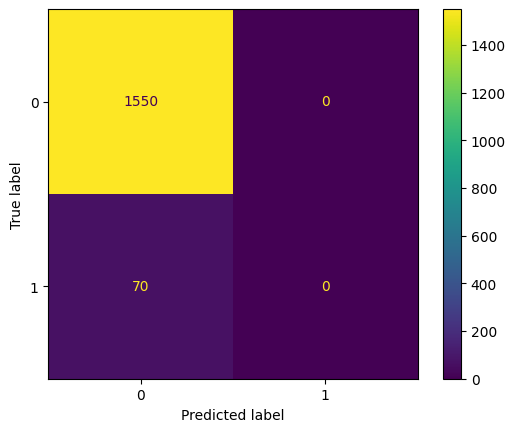

In [ ]:
train, test = train_test_split(df_hds, test_size=.33, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
predictions = naive_bayes_categorical(train, X=X_test, Y="stroke")

show_results(Y_test, predictions)

####Para o 2° Dataset (BRFSS2015), o dataset de teste correspondeu a 20% do dataset total, enquanto a de testes a 80%. Com isso, os seguintes resultados foram obtidos:

[0.0, 1.0]
Accuracy score: 0.5342669212815616
F1 score: 0.1655050057026993


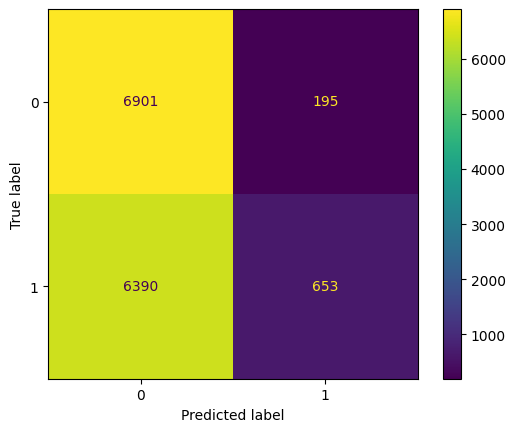

In [ ]:
train, test = train_test_split(df_brfss, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
predictions = naive_bayes_categorical(train, X=X_test, Y="Stroke")

show_results(Y_test, predictions)


##**IMPLEMENTAÇÃO 2: NaiveBayes**


Nessa implementação, aproximamos $P(Y)\prod _{i=1} ^{n}P(X_i|Y)$ de $log(P(Y)\prod _{i=1} ^{n}P(X_i|Y))$, já que todas as probabilidades giram em torno de 0 e 1 e o produto delas vai dar um valor bem pequeno.

Dessa forma, como log(A.B)=log(A)+log(B), queremos $argmaxP(Y)+\sum_{i=1} ^{n}log[P(X_i|Y)]$

Já para calcular P(X_i|Y), utilizaremos a distribuição gaussiana, que nos diz que

$P(X_i|Y)=\frac{1}{2\pi \sigma_y²}.exp(-\frac{(x_i\mu_y)²}{2\sigma_y²})$,

em que $\mu_y=E(y)$ e $\sigma_y²=V(y)$

###**CÓDIGO**

In [ ]:
class NaiveBayes:
    def fit(self, X, y):
        #n_samples será a quantidade de linhas e n_features a quantidade de colunas
        n_samples, n_features = X.shape
        #cria uma lista com os valores únicos de y
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # inicializa vetores com 0 para a média, variância e probabilidade simples para cada y (0 ou 1)
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        #calcula a média, variância e probabilidade simples para cada y (0 ou 1)
        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calcula P(Y|X) para cada Y
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # retorna o Y para qual a probabilidade P(Y|X) é maior
        return self._classes[np.argmax(posteriors)]

    #calcula a probabilidade com distribuição gaussiana
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator



###**RESULTADOS 2**


Dessa vez, a proporção de treino/teste foi 20%/80%

####Para o 1° dataset(HDS):

Accuracy score: 0.8431771894093686
F1 score: 0.18947368421052632


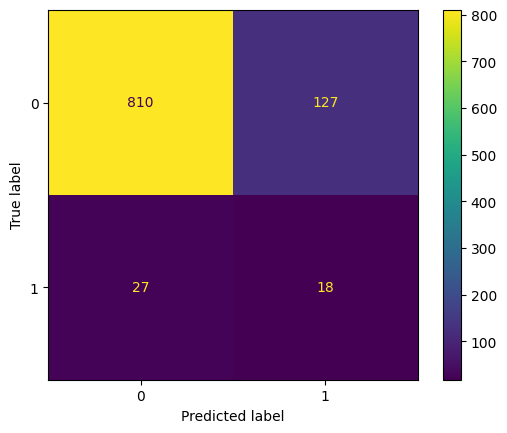

In [ ]:
train, test = train_test_split(df_hds, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
Y_train = train.iloc[:,-1].values


nb = NaiveBayes()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_test)

show_results(Y_test, predictions)

####Para o 2° Dataset (BRFSS2015):

Accuracy score: 0.7179432774595091
F1 score: 0.7145311381531854


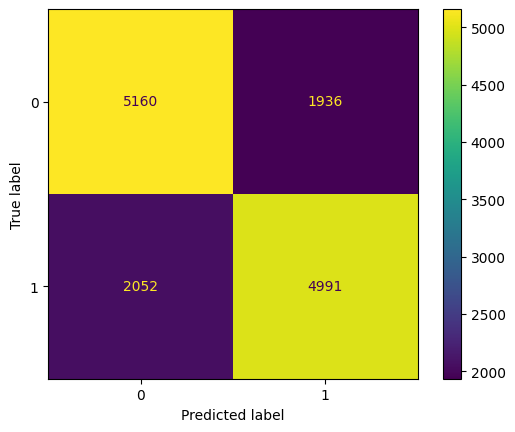

In [ ]:
train, test = train_test_split(df_brfss, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
Y_train = train.iloc[:,-1].values


nb = NaiveBayes()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_test)

show_results(Y_test, predictions)

##**IMPLEMENTAÇÕES DO SCIKIT-LEARN**

###**Gaussiana**


####**HDS**

Accuracy score: 0.9144602851323829
F1 score: 0.125


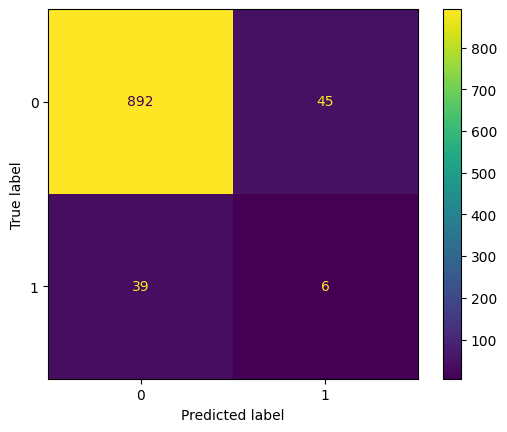

In [ ]:
train, test = train_test_split(df_hds, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
Y_train = train.iloc[:,-1].values

gnb = GaussianNB()
predictions = gnb.fit(X_train, Y_train).predict(X_test)

show_results(Y_test, predictions)

####**BRFSS2015**

Accuracy score: 0.7179432774595091
F1 score: 0.7145311381531854


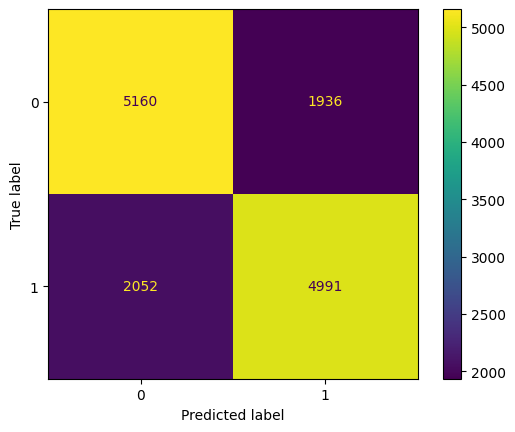

In [ ]:
train, test = train_test_split(df_brfss, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
Y_train = train.iloc[:,-1].values

gnb = GaussianNB()
predictions = gnb.fit(X_train, Y_train).predict(X_test)

show_results(Y_test, predictions)

###**Categórica**

####**HDS**

Accuracy score: 0.9103869653767821
F1 score: 0.16981132075471697


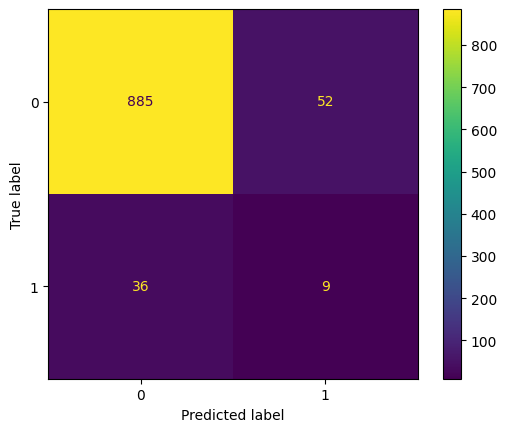

In [ ]:
train, test = train_test_split(df_hds, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
Y_train = train.iloc[:,-1].values


cnb = CategoricalNB(force_alpha=True)
predictions = cnb.fit(X_train, Y_train).predict(X_test)

show_results(Y_test, predictions)

####**BRFSS2015**

Accuracy score: 0.7318056439635052
F1 score: 0.7291815454935009


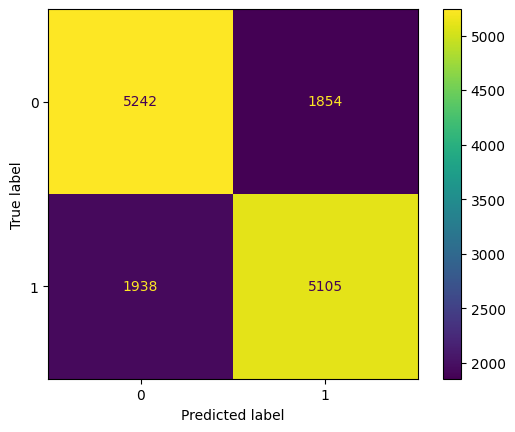

In [ ]:
train, test = train_test_split(df_brfss, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
Y_train = train.iloc[:,-1].values


cnb = CategoricalNB(force_alpha=True)
predictions = cnb.fit(X_train, Y_train).predict(X_test)

show_results(Y_test, predictions)